In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [115]:
df = pd.read_csv('solar_data.csv')
df = df.iloc[:,1:]

df.head()

,multi,cpg,save_time_id,save_time
0,0,0,20220225,2022-02-25 11:23:41
1,1,0,20220225,2022-02-25 11:24:41
2,2,0,20220225,2022-02-25 11:25:41
3,3,0,20220225,2022-02-25 11:26:42
4,4,0,20220225,2022-02-25 11:27:41


In [200]:
df_gsrems = df.copy()
df_gsrems['save_time'] = pd.to_datetime(df_gsrems['save_time'])

df_gsrems['save_time_id'] = pd.to_datetime(df_gsrems['save_time_id'], format='%Y%m%d')
df_gsrems['년'] = df_gsrems['save_time'].dt.year
df_gsrems['월'] = df_gsrems['save_time'].dt.month
df_gsrems['일'] = df_gsrems['save_time'].dt.day
df_gsrems['시간'] = df_gsrems['save_time'].dt.hour

df_gsrems.tail()

df1 = df_gsrems.copy()

In [158]:
for i in range(1, len(df_gsrems)) :
  yesterday_date = (df_gsrems.iloc[i]['save_time_id']-timedelta(days=1))

  filter_d = (df_gsrems['save_time_id'] == yesterday_date.strftime('%Y-%m-%d'))
  filter_m = (df_gsrems['multi'] == df_gsrems.iloc[i]['multi'])

  if filter_d.any():
    df_gsrems.loc[i, 'last_cpg_max'] = max(df_gsrems[filter_d & filter_m]['cpg'])
  else :
    df_gsrems.loc[i, 'last_cpg_max'] = 0

In [159]:
df_gsrems.fillna(0, inplace=True)

In [178]:
df_gsrems['금일누적발전량'] = df_gsrems['cpg']-df_gsrems['last_cpg_max']
df_gsrems['금일누적발전량'] = df_gsrems['금일누적발전량'].apply(lambda x: max(x, 0))

# df_gsrems.loc[25000]

multi                             4
cpg                               0
save_time_id    2022-03-21 00:00:00
save_time       2022-03-21 05:23:50
년                              2022
월                                 3
일                                21
시간                                5
last_cpg_max             21921000.0
금일누적발전량                         0.0
Name: 25000, dtype: object

In [179]:
df_today = df_gsrems[['년','월','금일누적발전량']]

df_today.head()

,년,월,금일누적발전량
0,2022,2,0.0
1,2022,2,0.0
2,2022,2,0.0
3,2022,2,0.0
4,2022,2,0.0


In [191]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

month_df = df_today.groupby(['년','월']).sum()

month_df

금일누적발전량
년    월             
2022 2   7554698000
     3   2051148000
     4   2619154000
     5   3222225000
     6   2302838000
     7   2432121000
     8   1984905000
     9   1773713000
     10  1938296000
     11  1359893000
     12  1244242000
2023 1   1434375000
     2   1569112000
     3  42611584000
     4   2203038000
     5   2437383000
     6   2484205000
     7    543095000
     8            0
     9            0

In [192]:
month_df.reset_index(inplace=True)

month_df.head()

,년,월,금일누적발전량
0,2022,2,7554698000
1,2022,3,2051148000
2,2022,4,2619154000
3,2022,5,3222225000
4,2022,6,2302838000


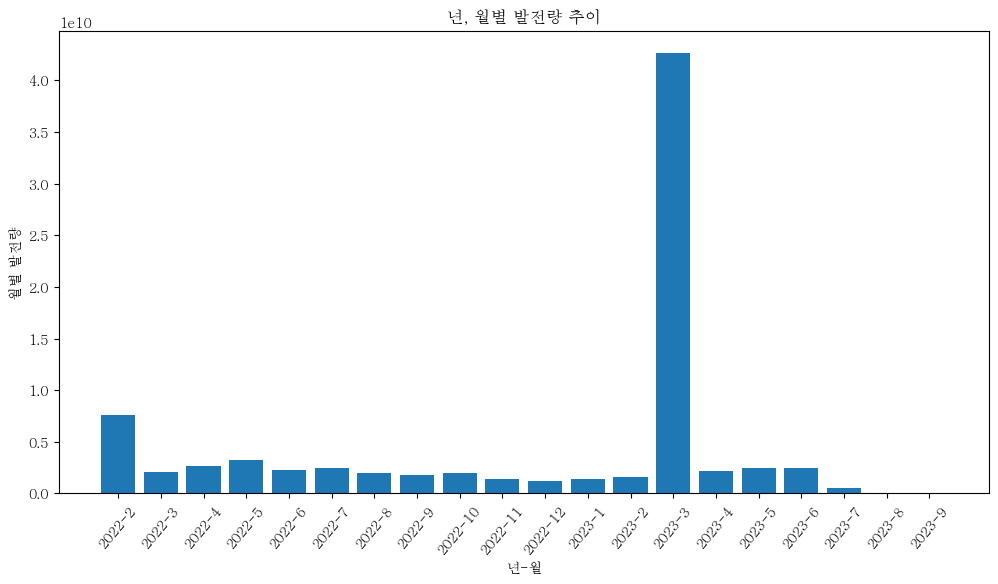

In [196]:
plt.figure(figsize=(12,6))
plt.bar(month_df['년'].astype(str) + '-' + month_df['월'].astype(str), month_df['금일누적발전량'])

plt.xlabel('년-월')
plt.ylabel('월별 발전량')
plt.title('년, 월별 발전량 추이')
plt.xticks(rotation=50)
plt.show()

In [201]:
df_test = df1.copy()

df_test.head()

,multi,cpg,save_time_id,save_time,년,월,일,시간
0,0,0,2022-02-25,2022-02-25 11:23:41,2022,2,25,11
1,1,0,2022-02-25,2022-02-25 11:24:41,2022,2,25,11
2,2,0,2022-02-25,2022-02-25 11:25:41,2022,2,25,11
3,3,0,2022-02-25,2022-02-25 11:26:42,2022,2,25,11
4,4,0,2022-02-25,2022-02-25 11:27:41,2022,2,25,11


In [207]:
df_result = df_test.groupby(['multi','년','월'])['cpg'].max()

df_result = df_result.reset_index()
print(df_result)

     multi     년  월        cpg
0        0  2022  2   19193000
1        0  2022  3   25122000
2        0  2022  4   31702000
3        0  2022  5   38827000
4        0  2022  6   43826000
..     ...   ... ..        ...
155      7  2023  5  107514000
156      7  2023  6  113950000
157      7  2023  7  115422000
158      7  2023  8          0
159      7  2023  9          0

[160 rows x 4 columns]


In [211]:
df_result['월별발생량'] = df_result.groupby(['multi','년'])['cpg'].diff()

df_result

,multi,년,월,cpg,월별발생량차이,월별발생량
0,0,2022,2,19193000,NaN,NaN
1,0,2022,3,25122000,5929000,5929000
2,0,2022,4,31702000,6580000,6580000
3,0,2022,5,38827000,7125000,7125000
4,0,2022,6,43826000,4999000,4999000
...,...,...,...,...,...,...
155,7,2023,5,107514000,6403000,6403000
156,7,2023,6,113950000,6436000,6436000
157,7,2023,7,115422000,1472000,1472000
158,7,2023,8,0,-115422000,-115422000


In [212]:
df_final = df_result.dropna()
df_final = df_final[df_final['월별발생량'] > 0]

df_final

,multi,년,월,cpg,월별발생량차이,월별발생량
1,0,2022,3,25122000,5929000,5929000
2,0,2022,4,31702000,6580000,6580000
3,0,2022,5,38827000,7125000,7125000
4,0,2022,6,43826000,4999000,4999000
5,0,2022,7,49224000,5398000,5398000
...,...,...,...,...,...,...
153,7,2023,3,95025000,5776000,5776000
154,7,2023,4,101111000,6086000,6086000
155,7,2023,5,107514000,6403000,6403000
156,7,2023,6,113950000,6436000,6436000


In [225]:
df_last = df_final.groupby(['년','월'])['월별발생량'].sum().reset_index()

df_last

,년,월,월별발생량
0,2022,3,48972000
1,2022,4,57142000
2,2022,5,65300000
3,2022,6,45393000
4,2022,7,48799000
5,2022,8,40978000
6,2022,9,39266000
7,2022,10,48339000
8,2022,11,36432000
9,2022,12,35622000


In [233]:
# df_last['월별발전량(MWh)'] = df_last['월별발생량'].astype(float)/1000000.0
df_last['월별발전량(MWh)'] = df_last['월별발생량']/1000000.00

df_last

,년,월,월별발생량,월별발전량(MWh)
0,2022,3,48972000.000,48.972
1,2022,4,57142000.000,57.142
2,2022,5,65300000.000,65.300
3,2022,6,45393000.000,45.393
4,2022,7,48799000.000,48.799
5,2022,8,40978000.000,40.978
6,2022,9,39266000.000,39.266
7,2022,10,48339000.000,48.339
8,2022,11,36432000.000,36.432
9,2022,12,35622000.000,35.622


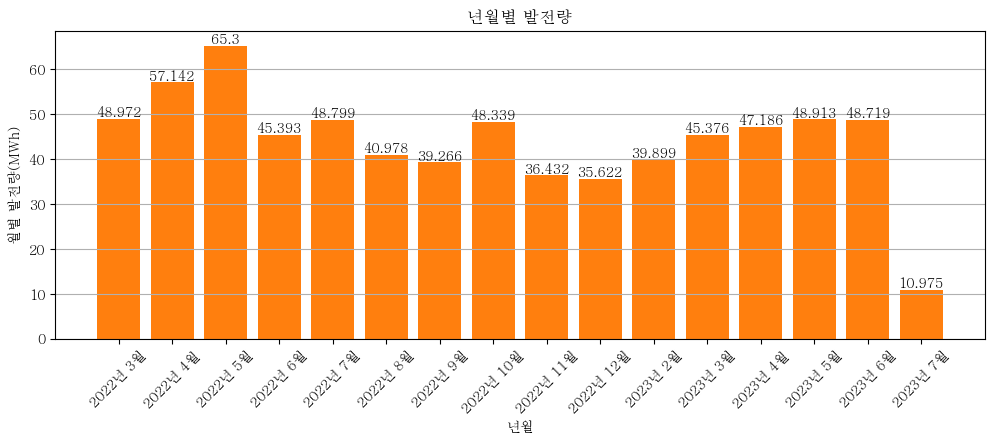

In [241]:
plt.figure(figsize=(12,4))

plt.bar(df_last.index, df_last['월별발전량(MWh)'])

bars = plt.bar(df_last.index, df_last['월별발전량(MWh)'])
# 각 막대의 높이에 해당하는 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')


# x축과 y축 라벨 설정
plt.xlabel('년월')
plt.ylabel('월별 발전량(MWh)')

# x축 눈금 레이블 설정
plt.xticks(df_last.index, [f'{int(row["년"])}년 {int(row["월"])}월' for idx, row in df_last.iterrows()], rotation=45)

# 그래프 제목 설정
plt.title('년월별 발전량')

# 그리드 표시
plt.grid(axis='y')

# 그래프 표시
plt.show()